In [1]:
import numpy as np
import pandas as pd


print("Done")

Done


In [2]:
import sys
print(sys.executable)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\python.exe


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Done")

Done


In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print("done")
     

done


In [5]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\spam.csv", encoding='ISO-8859-1')

print("done")
df.head()

done


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
print(df.shape[0])
print(df.shape[1])

5572
5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
dup = df.duplicated().sum()
print(dup)

403


In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
df.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
print(type(df))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [12]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


In [13]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


In [14]:
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)
print("done")

done


In [15]:
print(df.columns.tolist())

['Category', 'Message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [16]:
print(df.columns.tolist())

['Category', 'Message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [17]:
print(df.columns.tolist())

['Category', 'Message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5572 non-null   object
 1   Message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [19]:
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\spam.csv", encoding='latin-1')
print(df.head())
print(df.columns.tolist())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [20]:
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [21]:
print(df.columns.tolist())

['v1', 'v2']


In [22]:
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)
print("done")

done


In [23]:
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [24]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [25]:
import matplotlib.pyplot as plt
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

print("done")

done


Text(0.5, 1.0, 'Distribution of Spam vs Ham')

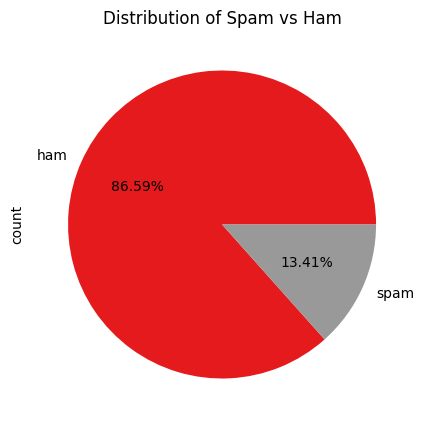

In [26]:
# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

In [27]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

In [28]:
comment_words = ''

In [29]:
stopwords = set(STOPWORDS)

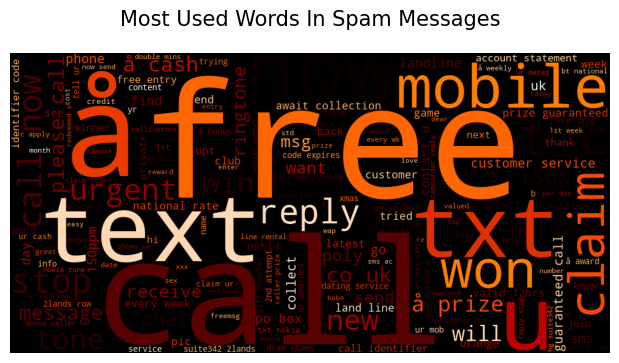

In [30]:
# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()



In [31]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

##ML traning


In [32]:
import seaborn as sns
print("done")

done


In [33]:
def evaluate_model(model, X_train, X_test, y_train, y_test):


    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

##ML Model: Multinomial Naive Bayes

In [34]:
import seaborn as sns
print("done")

done


In [35]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.9854236659016282
Test ROC AUC: 0.9719835302542069


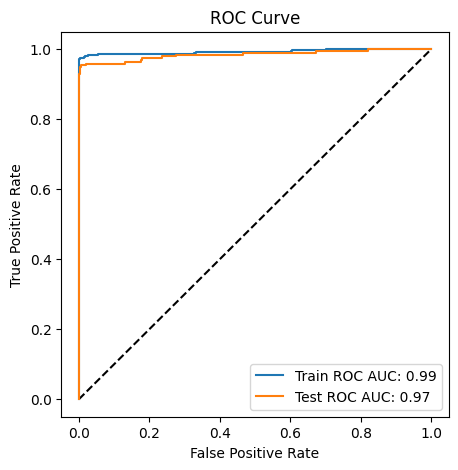


Confusion Matrix:


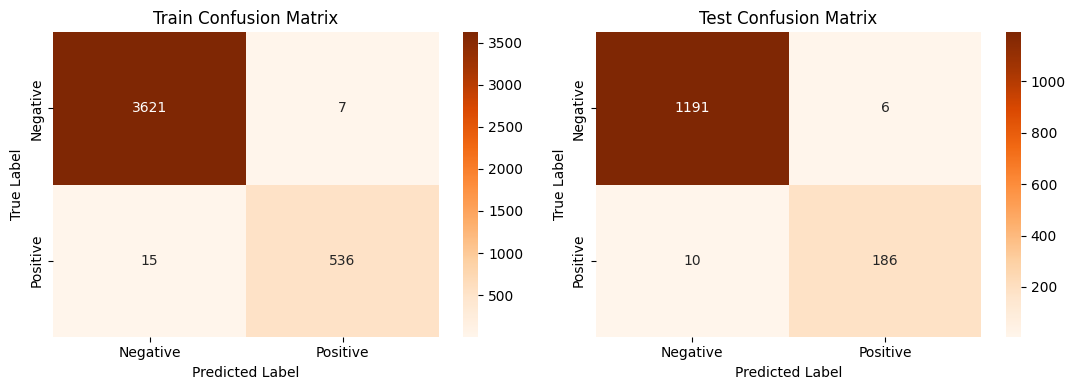


Train Classification Report:


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [36]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)
     

Email Spam Detection System

In [ ]:
def detect_spam(email_text):
    prediction = clf.predict([email_text])
    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"

In [ ]:
sample_email = 'Free Tickets for IPL'
result = detect_spam(sample_email)
print(result)

In [ ]:
sample_email = 'So Ì_ pay first lar... Then when is da stock comin...'
result = detect_spam(sample_email)
print(result)

In [ ]:
email = "hlw this is shivam pandey"
result = detect_spam(sample_email)
print(result)

In [ ]:
email = "Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! "
result = detect_spam(sample_email)
print(result)

In [ ]:
email = "hey priyanshu"
result = detect_spam(sample_email)
print(result)

In [ ]:
email = "Sorry, I'll call later in meeting."
result = detect_spam(sample_email)
print(result)

In [ ]:
email = "this is python class"
result = detect_spam(sample_email)
print(result)

In [ ]:
Email = "Free Tickets"
result = detect_spam(sample_email)
print(result)

In [ ]:
email = "hey priyanshu"
result = detect_spam(sample_email)
print(result)

In [ ]:
email ="XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"
result = detect_spam(sample_email)
print(result)

In [ ]:
sample_email = "XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"
result = detect_spam(sample_email)
print(result)

In [ ]:
import pickle
print("done")


In [ ]:
with open('model.pkl','wb') as file:
    pickle.dump(model, file)

In [ ]:
import joblib

joblib.dump(clf, "spam_model.pkl")


In [37]:
globals().keys()


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', 'np', 'pd', '_i2', 'sys', '_i3', 'plt', 'sns', '_i4', 'confusion_matrix', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score', 'roc_curve', 'classification_report', 'WordCloud', 'STOPWORDS', 'CountVectorizer', 'train_test_split', 'MultinomialNB', 'Pipeline', 'warnings', '_i5', 'df', '_5', '_i6', '_i7', '_i8', 'dup', '_i9', '_9', '_i10', '_10', '_i11', '_i12', '_i13', 'i', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i20', '_i21', '_i22', '_i23', '_i24', '_24', '_i25', 'spread', '_i26', '_26', '_i27', 'df_spam', '_i28', 'comment_words', '_i29', 'stopwords', '_i30', 'val', 'tokens', 'wordcloud', '_i31', 'X_train', 'X_test', 'y_train', 'y_test', '_i32', '_i33', 'evaluate_model', '_i34', '_i35', 'clf', '_i36', '_i37'])

In [38]:
[x for x in globals() if "vect" in x.lower() or "tfidf" in x.lower() or "count" in x.lower()]


['CountVectorizer']

In [40]:
import joblib
